In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
conn = sqlite3.connect('nfl.db')
cursor = conn.cursor()

teams_df = pd.read_sql_query("SELECT * FROM Teams", conn)
games_df = pd.read_sql_query("SELECT * FROM Games", conn)

conn.close()

### 1. Point Spread Accuracy
This bar chart shows the average spread difference (predicted vs. actual) for each team.

```python
plt.figure(figsize=(14, 7))
sns.barplot(x='spread_diff', y='Team', data=spread_accuracy, palette='coolwarm', hue='Team', dodge=False)
plt.legend().remove()
plt.title('Average Spread Difference (Predicted vs. Actual)')
plt.xlabel('Average Spread Difference')
plt.ylabel('Team')
plt.tight_layout()

plt.show()
```

### 2. Over/Under Trends
This bar chart shows the percentage of games that went over the total line for each team.

```python
plt.figure(figsize=(14, 7))
sns.barplot(x='over_under', y='Team', data=over_under_trends, palette='coolwarm', hue='Team', dodge=False)
plt.legend().remove()
plt.title('Percentage of Games Going Over the Total Line')
plt.xlabel('Percentage of Games Over')
plt.ylabel('Team')
plt.tight_layout()

plt.show()
```

### 3. Home Quarter Performance
This bar chart shows the average home team scores per quarter.

```python
plt.figure(figsize=(14, 7))
sns.barplot(x='Average_Score', y='Team', hue='Quarter', data=home_quarter_avg, palette='coolwarm')
plt.title('Average Home Team Scores Per Quarter')
plt.xlabel('Average Score')
plt.ylabel('Team')
plt.tight_layout()

plt.show()
```

### 4. Away Quarter Performance
This bar chart shows the average away team scores per quarter.

```python
plt.figure(figsize=(14, 7))
sns.barplot(x='Average_Score', y='Team', hue='Quarter', data=away_quarter_avg, palette='coolwarm')
plt.title('Average Away Team Scores Per Quarter')
plt.xlabel('Average Score')
plt.ylabel('Team')
plt.tight_layout()

plt.show()
```

Let's generate these visualizations.

### Generating Point Spread Accuracy Visualization
```python
plt.figure(figsize=(14, 7))
sns.barplot(x='spread_diff', y='Team', data=spread_accuracy, palette='coolwarm', hue='Team', dodge=False)
plt.legend().remove()
plt.title('Average Spread Difference (Predicted vs. Actual)')
plt.xlabel('Average Spread Difference')
plt.ylabel('Team')
plt.tight_layout()

plt.show()
```

### Generating Over/Under Trends Visualization
```python
plt.figure(figsize=(14, 7))
sns.barplot(x='over_under', y='Team', data=over_under_trends, palette='coolwarm', hue='Team', dodge=False)
plt.legend().remove()
plt.title('Percentage of Games Going Over the Total Line')
plt.xlabel('Percentage of Games Over')
plt.ylabel('Team')
plt.tight_layout()

plt.show()
```

### Generating Home Quarter Performance Visualization
```python
plt.figure(figsize=(14, 7))
sns.barplot(x='Average_Score', y='Team', hue='Quarter', data=home_quarter_avg, palette='coolwarm')
plt.title('Average Home Team Scores Per Quarter')
plt.xlabel('Average Score')
plt.ylabel('Team')
plt.tight_layout()

plt.show()
```

### Generating Away Quarter Performance Visualization
```python
plt.figure(figsize=(14, 7))
sns.barplot(x='Average_Score', y='Team', hue='Quarter', data=away_quarter_avg, palette='coolwarm')
plt.title('Average Away Team Scores Per Quarter')
plt.xlabel('Average Score')
plt.ylabel('Team')
plt.tight_layout()

plt.show()
```

In [3]:
games_df_filtered = games_df[games_df['season'] >= 2010]

/var/folders/hd/r4k9j4m15vd1bc_tnk5pn5_c0000gn/T/ipykernel_34727/918639898.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/var/folders/hd/r4k9j4m15vd1bc_tnk5pn5_c0000gn/T/ipykernel_34727/918639898.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] * len(teams))


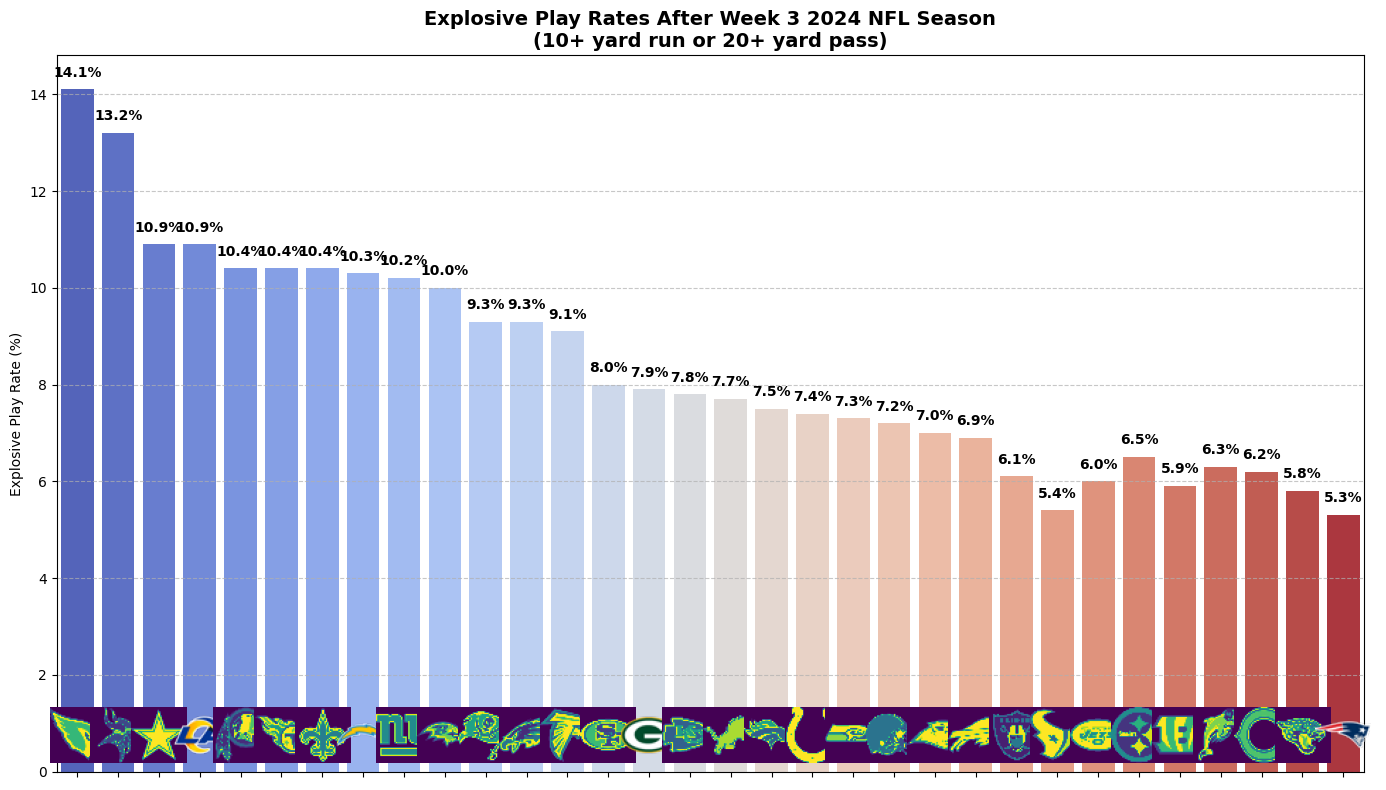

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import numpy as np

# Sample data
teams = [
    'ARI', 'MIN', 'DAL', 'LAR', 'WAS', 'TEN', 'NO', 'LAC', 'NYG', 'BAL', 
    'TB', 'PHI', 'ATL', 'SF', 'GB', 'KC', 'DET', 'DEN', 'IND', 'SEA', 
    'CLE', 'CAR', 'BUF', 'LVR', 'HOU', 'NYJ', 'PIT', 'CIN', 'MIA', 
    'CHI', 'JAX', 'NE'
]

# Corresponding play rates for each team
explosive_play_rates = [
    14.1, 13.2, 10.9, 10.9, 10.4, 10.4, 10.4, 10.3, 
    10.2, 10.0, 9.3, 9.3, 9.1, 8.0, 7.9, 7.8, 7.7, 
    7.5, 7.4, 7.3, 7.2, 7.0, 6.9, 6.1, 5.4, 6.0, 
    6.5, 5.9, 6.3, 6.2, 5.8, 5.3
]

# Create a DataFrame
df = pd.DataFrame({
    'Team': teams,
    'Explosive Play Rate (%)': explosive_play_rates
})

# Set the plot size
plt.figure(figsize=(14, 8))

# Create the barplot
ax = sns.barplot(
    x='Team', 
    y='Explosive Play Rate (%)', 
    data=df, 
    palette="coolwarm"
)

# Add data labels above the bars
for index, value in enumerate(df['Explosive Play Rate (%)']):
    ax.text(index, value + 0.2, f'{value}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Load and add images for each team
image_folder = 'images/'  # Path to the extracted images folder

def add_team_logo(axes, team_abbreviation, xpos, ypos):
    img_path = f"{image_folder}{team_abbreviation}.png"
    
    # Open the image and resize it to a fixed size (e.g., 40x40 pixels)
    logo = Image.open(img_path)
    logo = logo.resize((40, 40))  # Standardize the size to 40x40 pixels
    
    # Convert the image to an array to be used with matplotlib
    logo_array = np.array(logo)
    
    # Create an OffsetImage and add it to the chart
    imagebox = OffsetImage(logo_array, zoom=1)  # No zoom needed as the size is already standardized
    ab = AnnotationBbox(imagebox, (xpos, ypos), frameon=False, box_alignment=(0.5, -0.15))
    axes.add_artist(ab)

# Add logos below each bar
for i, team in enumerate(df['Team']):
    add_team_logo(ax, team, i, 0)

# Set chart title and labels
plt.title('Explosive Play Rates After Week 3 2024 NFL Season\n(10+ yard run or 20+ yard pass)', fontsize=14, weight='bold')
plt.xlabel('')
plt.ylabel('Explosive Play Rate (%)')

# Hide x-axis labels (since we're using logos)
ax.set_xticklabels([''] * len(teams))

# Show the grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.tight_layout()
plt.show()


/var/folders/hd/r4k9j4m15vd1bc_tnk5pn5_c0000gn/T/ipykernel_34727/3265647287.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/var/folders/hd/r4k9j4m15vd1bc_tnk5pn5_c0000gn/T/ipykernel_34727/3265647287.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] * len(teams))


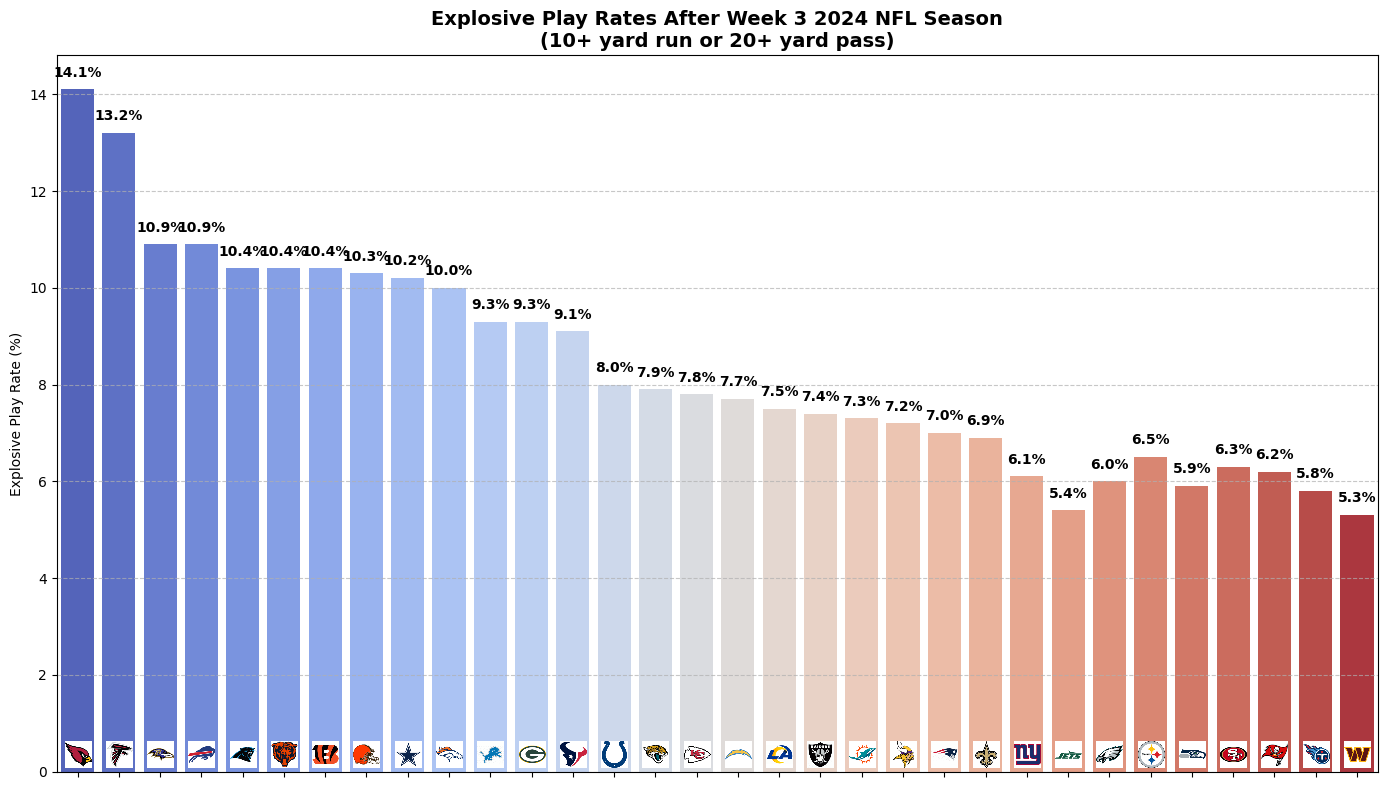

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

teams = [
    'crd', 'atl', 'rav', 'buf', 'car', 'chi', 'cin', 'cle', 'dal', 'den',
    'det', 'gnb', 'htx', 'clt', 'jax', 'kan', 'sdg', 'ram', 'rai', 'mia',
    'min', 'nwe', 'nor', 'nyg', 'nyj', 'phi', 'pit', 'sea', 'sfo', 'tam',
    'oti', 'was'
]

# Corresponding play rates for each team
explosive_play_rates = [
    14.1, 13.2, 10.9, 10.9, 10.4, 10.4, 10.4, 10.3, 
    10.2, 10.0, 9.3, 9.3, 9.1, 8.0, 7.9, 7.8, 7.7, 
    7.5, 7.4, 7.3, 7.2, 7.0, 6.9, 6.1, 5.4, 6.0, 
    6.5, 5.9, 6.3, 6.2, 5.8, 5.3
]

# Create a DataFrame
df = pd.DataFrame({
    'Team': teams,
    'Explosive Play Rate (%)': explosive_play_rates
})

# Set the plot size
plt.figure(figsize=(14, 8))

# Create the barplot
ax = sns.barplot(
    x='Team', 
    y='Explosive Play Rate (%)', 
    data=df, 
    palette="coolwarm"
)

# Add data labels above the bars
for index, value in enumerate(df['Explosive Play Rate (%)']):
    ax.text(index, value + 0.2, f'{value}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Load and add images for each team
image_folder = 'images/'  # Path to the extracted images folder

def add_team_logo(axes, team_abbreviation, xpos, ypos):
    img_path = f"{image_folder}{team_abbreviation}.png"
    logo = mpimg.imread(img_path)
    imagebox = OffsetImage(logo, zoom=0.15)
    ab = AnnotationBbox(imagebox, (xpos, ypos), frameon=False, box_alignment=(0.5, -0.15))
    axes.add_artist(ab)

# Add logos below each bar
for i, team in enumerate(df['Team']):
    add_team_logo(ax, team, i, 0)

# Set chart title and labels
plt.title('Explosive Play Rates After Week 3 2024 NFL Season\n(10+ yard run or 20+ yard pass)', fontsize=14, weight='bold')
plt.xlabel('')
plt.ylabel('Explosive Play Rate (%)')

# Hide x-axis labels (since we're using logos)
ax.set_xticklabels([''] * len(teams))

# Show the grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.tight_layout()
plt.show()


In [19]:
import os
import requests

# List of team abbreviations
teams = [
    'crd', 'atl', 'rav', 'buf', 'car', 'chi', 'cin', 'cle', 'dal', 'den',
    'det', 'gnb', 'htx', 'clt', 'jax', 'kan', 'sdg', 'ram', 'rai', 'mia',
    'min', 'nwe', 'nor', 'nyg', 'nyj', 'phi', 'pit', 'sea', 'sfo', 'tam',
    'oti', 'was'
]

# Base URL for the team logos
base_url = "https://cdn.ssref.net/req/202409272/tlogo/pfr/"

# Directory to save the images
save_dir = "images"
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Function to download an image
def download_image(team):
    url = f"{base_url}{team}.png"
    response = requests.get(url)
    if response.status_code == 200:
        with open(os.path.join(save_dir, f"{team}.png"), 'wb') as f:
            f.write(response.content)
        print(f"Downloaded: {team}.png")
    else:
        print(f"Failed to download: {team}.png")

# Download all team logos
for team in teams:
    download_image(team)

print("All team logos downloaded successfully.")


Downloaded: crd.png
Downloaded: atl.png
Downloaded: rav.png
Downloaded: buf.png
Downloaded: car.png
Downloaded: chi.png
Downloaded: cin.png
Downloaded: cle.png
Downloaded: dal.png
Downloaded: den.png
Downloaded: det.png
Downloaded: gnb.png
Downloaded: htx.png
Downloaded: clt.png
Downloaded: jax.png
Downloaded: kan.png
Downloaded: sdg.png
Downloaded: ram.png
Downloaded: rai.png
Downloaded: mia.png
Downloaded: min.png
Downloaded: nwe.png
Downloaded: nor.png
Downloaded: nyg.png
Downloaded: nyj.png
Downloaded: phi.png
Downloaded: pit.png
Downloaded: sea.png
Downloaded: sfo.png
Downloaded: tam.png
Downloaded: oti.png
Downloaded: was.png
All team logos downloaded successfully.
